# Chapter 9 회귀분석

In [27]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pylab as plt

## 9.7 변수변환

- 변수변환의 필요성

    - 선형회귀모형의 기본 가정 중 하나는 오차($\epsilon$)가 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따른다는 것이다. 그러나 이러한 가정은 항상 성립하지 못한다.

    - 선형회귀모형인 $Y=\beta_0+\beta_1x+\epsilon$이 $X$와 $Y$의 관계를 나타내는 데 부적합한 경우가 있을 수 있다.

### 9.7.1 비선형의 관계 : X만 변환시키는 경우

- 설명변수 $X$를 변환시키는 경우(해야하는 경우)

    - 오차의 분포가 정규분포에 가깝고 등분산성을 만족하나 $X$와 $Y$가 비선형관계에 있는 경우

- 변환 예시

    - 상승(한계체감)

        - $Y = \beta_0 + \beta_1\sqrt{X} + \epsilon$

        - $Y = \beta_0 + \beta_1\log{X} + \epsilon$

    - 상승(한계체증)

        - $Y = \beta_0 + \beta_1X^2 + \epsilon$

        - $Y = \beta_0 + \beta_1e^{X} + \epsilon$

    - 하락(한계체감)

        - $Y = \beta_0 + \beta_1e^{-X} + \epsilon$
        
        - $Y = \beta_0 + \beta_1\cfrac{1}{X} + \epsilon$
            

### 9.7.1 [ 실습 ]

- 원자료 회귀분석

In [8]:
x = np.array([0.5, 0.5, 1.0, 1.0, 1.5, 1.5, 2.0, 2.0, 2.5, 2.5])
y = np.array([46, 51, 71, 75, 92, 99, 105, 112, 121, 125])
data = {'Y':y, 'X':x}
data = pd.DataFrame(data)

fit1 = smf.ols('Y~X', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     254.4
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.39e-07
Time:                        20:53:59   Log-Likelihood:                -29.508
No. Observations:                  10   AIC:                             63.02
Df Residuals:                       8   BIC:                             63.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3500      3.836      8.954      0.0

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


- 변수변환 회귀분석

In [11]:
data['root_X'] = np.sqrt(data['X'])
fit2 = smf.ols('Y~root_X', data).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     597.8
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           8.36e-09
Time:                        20:56:49   Log-Likelihood:                -25.325
No. Observations:                  10   AIC:                             54.65
Df Residuals:                       8   BIC:                             55.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6871      4.284     -2.728      0.0

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


### 9.7.2 오차에 대한 가정 미성립 : Y를 변환시키는 경우

- 반응변수 $Y$를 변환시키는 경우(해야하는 경우)

    - 회귀분석의 오차에 대한 기본 가정이 성립하지 않는 경우

        - $\epsilon \sim N(0,\sigma^2)$

        - 반응변수를 변환시킬 경우 변환된 $Y'$값의 분포 자체가 변하므로 잔차의 분포도 그 형태가 바뀐다.

    - 예시

        - 상승(한계체감)

            - $\sqrt{Y+0.375} = \beta_0 + \beta_1X + \epsilon$   $\rightarrow$   $Y = (\beta_0 + \beta_1X + \epsilon)^2-0.375$

### 9.7.2 [ 실습 ]

- 원자료 회귀분석

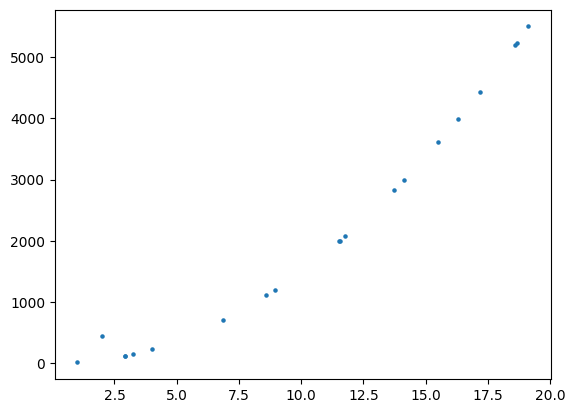

In [32]:
x = np.array([8.6, 19.13, 14.13, 11.78, 2.93, 2.93, 1.01, 18.67, 11.54, 8.95, 11.55, 3.26, 4.02, 17.17, 13.73, 16.31, 6.85, 18.6, 1.99, 15.51])
y = np.array([1108.89, 5497.87, 2997.91, 2083.33, 128.93, 128.86, 15.35, 5234.26, 1998.53, 1202.51, 1999.84, 159.54, 242.52, 4426.5, 2825.33, 3992.92, 704.91, 5189.57, 445.52, 3609.53])

plt.scatter(x, y, s = 5, marker = 'o')

In [34]:
data = {'Y':y, 'X':x}
data = pd.DataFrame(data)

fit1 = smf.ols('Y~X', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     287.0
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.65e-12
Time:                        21:19:34   Log-Likelihood:                -150.64
No. Observations:                  20   AIC:                             305.3
Df Residuals:                      18   BIC:                             307.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -918.6430    212.637     -4.320      0.0

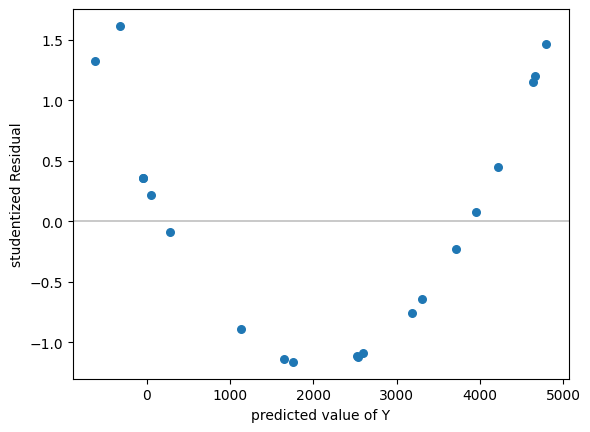

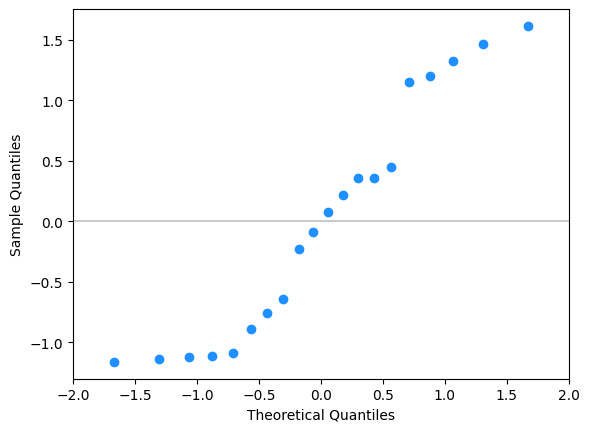

In [37]:
plt.scatter(fit1.predict(), fit1.resid_pearson, s = 30, marker = 'o')
plt.axhline(y = 0, color = 'k', linewidth = 0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized Residual')

p1 = sm.qqplot(fit1.resid_pearson, markerfacecolor = 'dodgerblue',
               markeredgecolor = 'dodgerblue', marker = 'o')
plt.axhline(y = 0, color = 'k', linewidth = 0.3)
plt.xlim([-2, 2])
plt.show()

- 변수변환 회귀분석

In [45]:
data['log_Y'] = np.sqrt(data['Y']) + 0.375
fit2 = smf.ols('log_Y~X', data).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1185.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           7.01e-18
Time:                        21:25:16   Log-Likelihood:                -48.727
No. Observations:                  20   AIC:                             101.5
Df Residuals:                      18   BIC:                             103.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6630      1.302      2.045      0.0

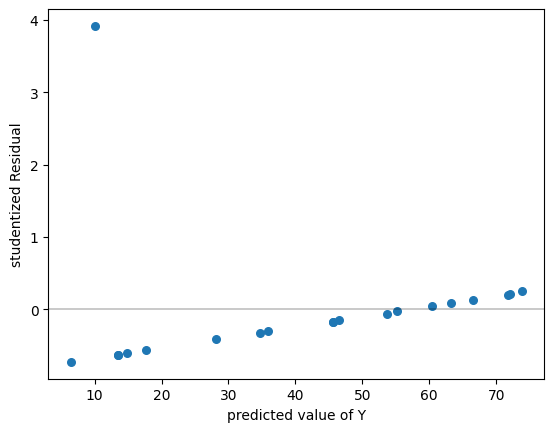

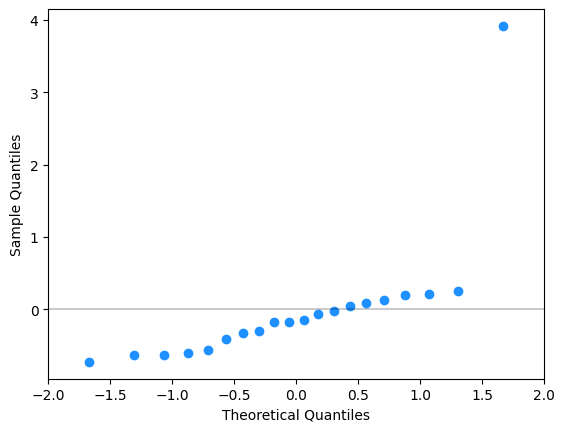

In [46]:
plt.scatter(fit2.predict(), fit2.resid_pearson, s = 30, marker = 'o')
plt.axhline(y = 0, color = 'k', linewidth = 0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized Residual')

p1 = sm.qqplot(fit2.resid_pearson, markerfacecolor = 'dodgerblue',
               markeredgecolor = 'dodgerblue', marker = 'o')
plt.axhline(y = 0, color = 'k', linewidth = 0.3)
plt.xlim([-2, 2])
plt.show()

## 9.8 다중선형회귀모형

### 9.8.1 모형의 형태

- $Y_i = \beta_{0}+\beta_1x_{i1}+\beta_{2}x_{i2}+ \cdots + \beta_px_{ip} + \epsilon_{i}$

- (가정) $\epsilon \sim N(0,\sigma^2)$

### 9.8.2 회귀결과에 대한 분석

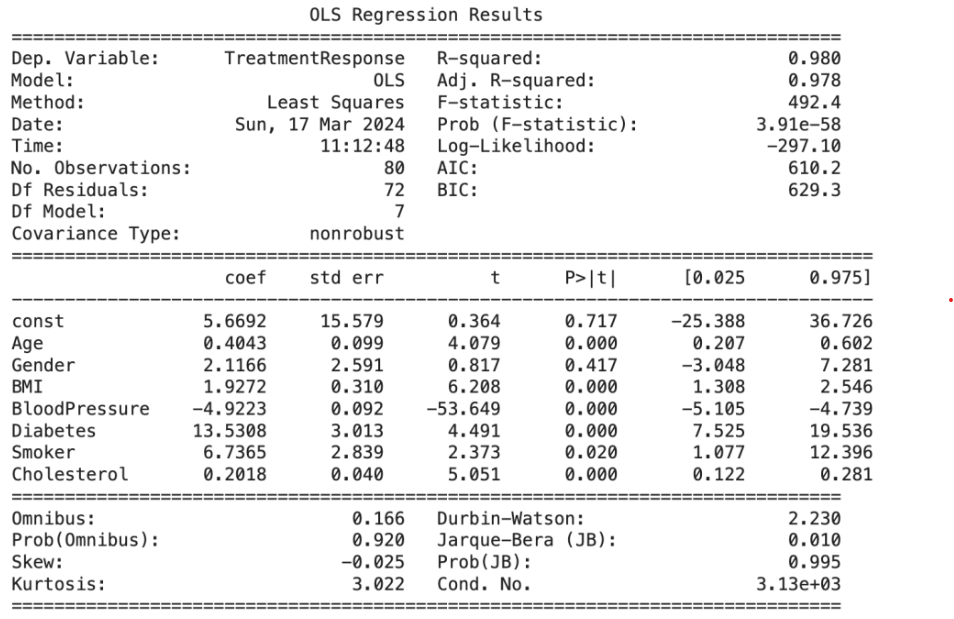

- 분산분석

    - F값이 492.4이며 p값은 3.91-58로 매우 작다.

    - 따라서 귀무가설($H_0$) : $\beta_1=\beta_2=\beta_3=\cdots=0$ 을 기각한다. 즉, 모든 설명변수가 $Y$를 설명할 수 없다라는 귀무가설을 기각하는 것이다.

- coef에 대한 분석

    - $\beta$

        - $Age$에 대한 $\beta_{Age}=0.4043$이 되며, 이는 다른 모든 설명변수가 고정일 때 $age$가 증가하면 $Y$가 0.4043만큼 증가함을 의미한다.
        
        - $\beta_{Age}의 $p$값은 0.000 으로 매우 작다.

        - 따라서 귀무가설($H_0$) : $\beta_{Age}=0$ 을 기각한다. 즉, $Age$는 $Y$에 유의미한 변수이다.

    - $intercept$

        - 절편에 대한 설명은 필요가 없음

        - 모든 설명변수 값이 0일 때의 $Y$값을 의미하기 때문

    - $R^{2}$와 $R^{2}_{adj}$

        - $R^{2}$는 총 변동 중에서 $X$에 의해 $Y$가 설명되는 변동이 차지하는 비율을 의미
        
            - 한계점 : 설명변수가 많을 수록 커지거나 유지되므로(즉, 설명변수가 많으면 무조건 같거나 커지므로) 설명변수 추가에 대한 모형의 성능 개선 정도를 알 수가 없음

        - $R^{2}_{adj}$는 새로 추가된 설명변수가 유의미한지를 판단하는 기준으로 결정계수 $R^{2}$를 보완

            - 주의점 : 결정계수보다 더 좋은 값으로 이해해서는 안되며, 변수선택에 사용되는 기준임

## 9.9 표준화

### 9.9.1 표준화의 필요성

- 여러 가지 변수를 측정할 때 그 변수의 측정 단위가 다르므로 변수의 측정 단위를 업애주고자 진행

### 9.9.2  표준화의 형태

- $Y_{i} = \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon$

    - $Y^*_{i}=\cfrac{Y_i-\bar{y}}{s_Y}$

    - $x^*_{i1}=\cfrac{x_{i1}-\bar{x_1}}{s_1}$

    - $x^*_{i2}=\cfrac{x_{i2}-\bar{x_2}}{s_2}$

- 위와 같이 표준화시킨 후 회귀분석하여 얻은 계수들을 베타계수라고 부른다.

### 9.9.2 [ 실습 ]

- 표준화전 회귀분석

In [47]:
y = np.array([0, 20, 22, 15, 17, 30, 18, 25, 10, 20])
x1 = np.array([4, 8, 9, 8, 8, 12, 6, 10, 6, 9])
x2 = np.array([4, 10, 8, 5, 10, 15, 8, 13, 5, 12])

d = {'y' : y, 'x1' : x1, 'x2' : x2}
data = pd.DataFrame(data = d)

fit1 = smf.ols('y~x1+x2', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     25.95
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           0.000578
Time:                        22:30:43   Log-Likelihood:                -24.127
No. Observations:                  10   AIC:                             54.25
Df Residuals:                       7   BIC:                             55.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1404      4.121     -1.975      0.0

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


- 표준화후 회귀분석

In [48]:
from scipy import stats

data_z = data.select_dtypes(include = [np.number]).dropna().apply(stats.zscore)
# select_dtypes(include = [np.number])는 데이터 중 숫자만을 선택한다.
# apply(stats.zscore) 를 통해 표준화 처리
fit2 = smf.ols('y~x1 + x2', data = data_z).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     25.95
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           0.000578
Time:                        22:34:07   Log-Likelihood:                -3.5390
No. Observations:                  10   AIC:                             13.08
Df Residuals:                       7   BIC:                             13.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.776e-17      0.130   2.13e-16      1.0

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


## 9.10 질적변수의 설명변수

### 9.10.1 질적변수의 형태

- 성별, 거주지역, 계절 등과 같은 질적 자료에 대한 변수

- 특히, (0, 1)로 나타낼 수 있는 설명변수를 가변수(지적변수)라고 부른다.

    - 예컨대 계절인 경우 아래를 살펴보자

        - 봄 1

        - 여름 2

        - 가을 3

        - 겨울 4

    - 위의 경우에는 설명변수로 활용이 어렵다. 회귀분석 상에서 계절의 변동을 설명할 수 없기 때문이다. 예컨대 1과 2가 동시에 존재할 경우 이는 봄이면서 여름임을 의미하게 된다.
    
    - 따라서 아래와 같이 사용해야 한다. 아래의 경우를 살펴보자.

        - $S_1$

            - 1 : 봄일 경우
            - 0 : 봄이 아닐 경우

        - $S_2$

            - 1 : 여름일 경우
            - 0 : 여름이 아닐 경우

        - $S_3$

            - 1 : 가을일 경우
            - 0 : 가을이 아닐 경우

    - 이 경우 겨울에 대해서는 $S_1 = S_2 = S_3 = 0$ 로 대응할 수 있다.

### 9.10.2  질적변수의 해석

- 아래 예시를 살펴보자

    - $Y=\beta_0+\beta_1E_1+\beta_1E_2+\beta_3(SEX)+\epsilon$

    - $SEX$

        - 1 : 여자인 경우
        - 0 : 남자인 경우

- 위 예시에서 남자일 경우 0, 여자일 경우 1이므로 남자가 여자보다 $\beta_1$만큼 증가 (또는 감소)시킨다고 해석할 수 있다.

- 이번엔 아래의 예시를 살펴보자

    - $E_1$

        - 1 : 고등학교 졸업인 경우
        - 0 : 기타

    - $E_2$

        - 1 : 대학교 졸업인 경우
        - 0 : 기타

- 위 예시에서 기타는 $E_1 = 0, E_2 = 0$의 경우 대학원 졸업을 의미한다. 

- 이 경우 $\beta_1$의 경우 대학원 졸업자에 비해 고등학교 졸업자의 $Y$ 증가분(감소분)을 의미하며, $\beta_2$의 경우 대학원 졸업자에 비해 대학교 졸업자의 $Y$ 증가분(감소분)을 의미하게 된다.

- 만약 $E_1 = 0, E_2 = 1$인 경우 이는 고등학교 졸업자에 비해 대학교 졸업자가 $|\beta_2 - \beta_1|$만큼 $Y$를 증가시킨다.


### 9.10.2 [ 실습 ]

In [50]:
sex = np.array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])
edu = np.array([1, 1, 2, 3, 2, 3, 1, 1, 2, 3, 2, 3])
year = np.array([6, 4, 4.5, 5.5, 3, 8, 7, 5, 3, 4, 4, 7.5])
sal = np.array([195, 190, 225, 220, 205, 260, 200, 190, 200, 240, 200, 255])

d = {'sex' : sex, 'edu' : edu, 'year' : year, 'sal' : sal}
data = pd.DataFrame(data = d)

# 더미변수 처리
data['edu_dum1'] = 0
data.loc[data['edu'] == 1, 'edu_dum1'] = 1
data['edu_dum2'] = 0
data.loc[data['edu'] == 2, 'edu_dum2'] = 1

fit1 = smf.ols('sal~sex+edu_dum1+edu_dum2+year', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                    sal   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     30.35
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           0.000163
Time:                        23:39:18   Log-Likelihood:                -37.611
No. Observations:                  12   AIC:                             85.22
Df Residuals:                       7   BIC:                             87.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.5585     12.410     15.517      0.0

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


## 9.11 부분가설검정

### 9.11.1 축차제곱합

- 기본모형

    - $Y_{i} = \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon$

    - $SST = SSE + SSR$

- 위 모형 중 $SSR = \displaystyle\sum^{n}_{i = 1}(\hat{y_i} - \bar{y})^2=SSR(X_1, \ X_2)$ 로 표현할 수 있다.

    - 여기서 $SSR(X_1, \ X_2)$은 $(X_1, \ X_2)$ 모두를 설명변수로 하였을 때의 회귀제곱합이며, 이는 아래와 같이 변수를 추가했다는 의미로도 해석이 가능하다.

    - $SSR(X_1, \ X_2) = SSR(X_1) + SSR(X_2 \ | \ X_1)$

    - 위 식에서 회귀제곱합은 변수가 추가될 때마다 $SSR(X_p \ | \ X_1, \ X_2, \ \cdots, \ X_{p-1})$ 와 같이 추가되는데, 이렇게 추가된 우측의 항들을 축차제곱합(추가제곱합)이라고 부른다.

- 위 축차제곱합에 대해 설명변수 몇 개의 묶음에 대한 제곱합도 얻을 수 있다.

    - 예컨대 설명변수 $(X_1, \ X_2, \ X_3, \ X_4)$에 대해 두 개의 설명변수 $(X_3, \ X_4)$가 회귀제곱합에 미치는 영향은 아래와 같다.

    - $SSR(X_1, \ \cdots, \ X_4) = SSR(X_1, \ X_2) + SSR(X_3, \ X_4 \ | \ X_1, \ X_2)$

    - 위 식을 통해 $SSR(X_3, \ X_4 \ | \ X_1, \ X_2) = SSR(X_1, \ \cdots, \ X_4) - SSR(X_1, \ X_2)$ 를 얻을 수 있다.
    
        - 위 식이 가능한 이유는 두 설명변수의 묶음 $(X_3, \ X_4)$이 기존 설명변수 $X_1, \ X_2$가 이미 주어져있다고 가정하기 때문이다.

    - 또한 $SSR(X_3, \ X_4 \ | \ X_1, \ X_2) = SSR(X_3, \ | \ X_1, \ X_2) + SSR(X_4, \ | \ X_1, \ X_2, \ X_3)$

### 9.11.2 회귀분석의 축소모형에 대한 가설검정

- 가설검정의 모형 형태

    - 축소모형에 대한 가설검정 : 설명변수가 $p$개인 모형에서 두 개의 설명변수 $x_j$와 $x_k$가 얼마나 유의적인가를 알아보기 위해 가설검정하는 경우

        - $H_0 \ : \ \beta_j = \beta_k = 0$

        - $H_1 \ : H_0$가 아니다.

    - 이 경우 완전모형의 회귀제곱합과 축소모형의 회귀제곱합의 차이가 얼마나 유의적인가를 알아냄으로써 검정을 수행할 수 있다.

    - 예를 들어 설명변수가 5개인 회귀분석의 문제에서 완전모형과 축소모형은 아래와 같다.

        - [ 완전모형 ] $Y_{i} = \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+ \ \cdots, \ +\beta_5x_{i5} +\epsilon$

        - [ 축소모형 ] $Y_{i} = \beta^*_0+\beta^*_3x_{i3}+\beta^*_4x_{i4}+\beta^*_5x_{i5}+\epsilon$

            - 이때 $\beta^*$는 기존 완전모형에서의 $\beta$와는 그 값이 달라지기 때문에 표시한 것이다.

- 가설검정 방법

    - 위 예시의 경우 "축소모형에 두 개의 설명변수 $X_1$과 $X_2$가 추가될 때의 회귀제곱합의 증가분이 얼마나 큰지를 활용하여 검정"이 가능하다.

        - 즉, $SSR(X_1, \ X_2 | X_3, \ X_4, \ X_5) = SSR(X_1, \ \cdots \ X_5) - SSR(X_3, \ X_4, \ X_5)$ 이 유의적으로 크면 $H_0$를 기각한다.

    - 검정통계량은 아래와 같다.

        - $F = \cfrac{SSR(X_1, \ X_2 | X_3, \ X_4, \ X_5) / 2}{SSE(X_1, \ \cdots , \ X_5)/(n-5-1)}$

        - 자유도는 $n-5-1$ 이며 완전모형의 모수(6)에서 축소모형의 모수(4)를 뺀값이 된다.

### 9.11.3 부분제곱합

- 부분제곱합 : 특정 하나의 변수가 추가될 때 얻어지는 회귀제곱합의 증가분을 말한다.

    - $SSR(X_j \ | \ X_1, \cdots, \ X_{j-1}, \ X_{j+1}, \ \cdots, \ X_p)$

    - 즉, $X_j$를 제외한 다른 모든 설명변수로 설명되는 회귀제곱합보다 $X_j$를 추가했을 때의 회귀제곱합이 얼마나 증가하는지를 나타내고 있다.

### 9.11.4 특정 변수가 회귀분석모형에 필요한지에 대한 가설검정

- 귀무가설 및 대립가설

    - $H_0 \ : \ \beta_j = 0$

    - $H_1 \ : \beta_j$가 0이 아님

- 검정통계량은 아래와 같다.

    - $F = \cfrac{SSR(X_j \ | \ X_1, \cdots, \ X_{j-1}, \ X_{j+1}, \ \cdots, \ X_p)}{SSE(X_1, \ \cdots , \ X_p)/(n-p-1)}$

    - $partial-F$라고도 하며, 변수선택의 기준이 되기도 한다.

### 9.11.5 부분결정계수

- 부분제곱합으로 부분결정계수를 구할 수 있다.

- 부분결정계수란, 특정 변수 $X_j$가 회귀분석모형에 포함되어 있을 때, $X_j$가 $Y$의 변동을 설명하여 주지 못하는 부분($SSE(X_j)$) 중 $X_k$가 추가되어 $Y$를 얼마나 더 설명해줄 수 있는가를 나타내주는 계수이다.

    - $R^2_{Yk,j}=\cfrac{SSR(X_k \ | \ X_j)}{SSE(X_j)}$

## 9.12 변수선택

- 어떤 설명변수를 사용하여 $Y$를 설명하는 것이 바람직한지에 대한 논의

### 9.12.1 후진제거법

- 후진제거법 : 고려하고 있는 모든 설명변수를 모형에 포함한 후, 가장 중요하지 않은 설명변수부터 차례대로 제외하는 방법

    - 제외 기준 : 부분제곱합으로부터 얻어지는 부분 $F$값($partial-F$)

    - 방법 : 설명변수 중에서 가장 작은 $partial-F$값을 갖는 설명변수부터 차례대로 제거

    - 한계점 : 일단 제외한 설명변수를 다시 선택할 수 없음

        - 이는 변수간의 상관관계가 존재할 수 있기때문에 한계점이 됨

### 9.12.2 전진선택법

- 전진선택법 : 고려하고 있는 모든 설명변수를 가장 중요한 설명변수부터 차례대로 모형에 추가하는 방법

    - 추가 기준 : 부분제곱합으로부터 얻어지는 부분 $F$값($partial-F$)

    - 방법 : 설명변수 중에서 가장 큰 $partial-F$값을 갖는 설명변수부터 차례대로 추가하여 더 이상 유의적인 설명변수가 없을 때까지 진행

    - 한계점 : 어떤 설명변수가 일단 모형에 선택되면 이후에 다른 설명변수의 추가로 인해 그 설명변수가 중요하지 않게 되더라도 그 변수를 제거할 수 없음

        - 이는 변수간의 상관관계가 존재할 수 있기때문에 한계점이 됨

### 9.12.3 단계적선택법

- 단계적 선택법 : 전진선택법의 문제점을 개선하고 후진제거법을 가미한 방법

    - 방법

        - 전진선택법에 따라 가장 큰 $partial-F$를 갖는 설명변수를 선택하여 모형에 포함하되 새로 추가

        - 만약, 새로 추가되는 설명변수로 인해 필요없게 되는 설명변수가 있을 경우 후진제거법으로 제거

        - 위 과정을 더 이상 추가 혹은 제거할 변수가 없을 때까지 진행